In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('loan_approval_dataset.csv')

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [5]:
df.sample(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
2687,2688,1,Not Graduate,No,9600000,28300000,6,536,18700000,9300000,27300000,6000000,Rejected
4163,4164,3,Graduate,No,8900000,24400000,10,774,11200000,6100000,31400000,7300000,Approved
2314,2315,4,Graduate,No,7200000,23100000,12,632,4600000,8500000,19400000,4400000,Approved
3106,3107,0,Graduate,No,5600000,11600000,12,466,15000000,7400000,21800000,7500000,Rejected
3389,3390,1,Not Graduate,No,4300000,16400000,20,397,6700000,6200000,10200000,5700000,Rejected


In [6]:
df.shape

(4269, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [3]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

len(numerical_cols), len(categorical_cols)

(10, 3)

In [4]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [5]:
df.describe(include='object')

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


# check on duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

# check and handle for missing values

In [7]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [8]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df = df.drop(columns=['loan_id'])
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [10]:
df[' loan_status'].unique()


array([' Approved', ' Rejected'], dtype=object)

In [11]:
df[' loan_status'] = df[' loan_status'].apply(lambda x: 1 if x == ' Approved' else 0)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

df.head()


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


/tmp/ipykernel_26256/3595499619.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=' loan_status', palette='viridis')


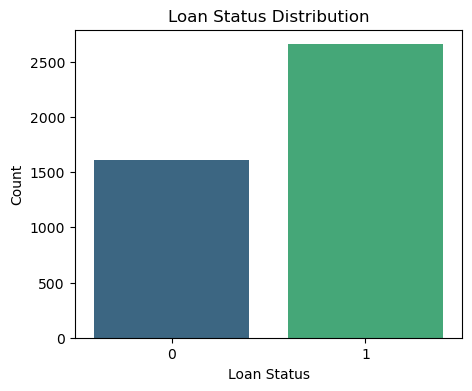

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.countplot(data=df, x=' loan_status', palette='viridis')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


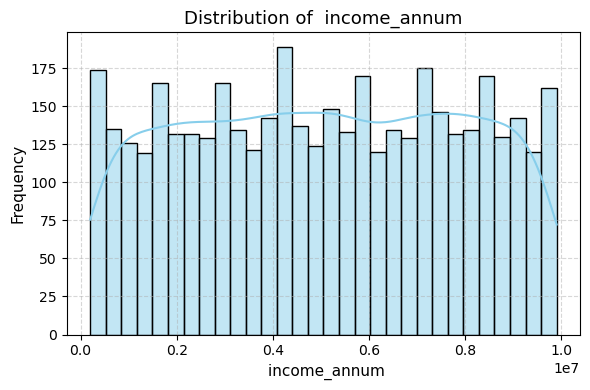

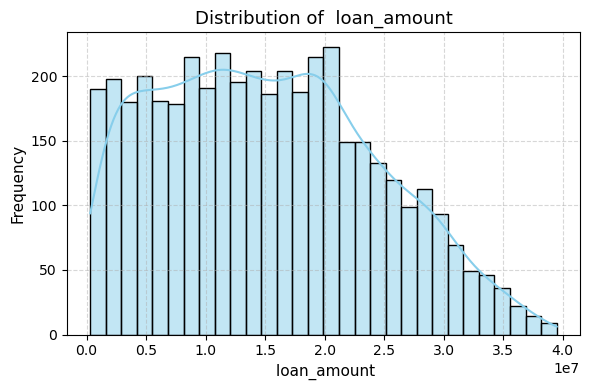

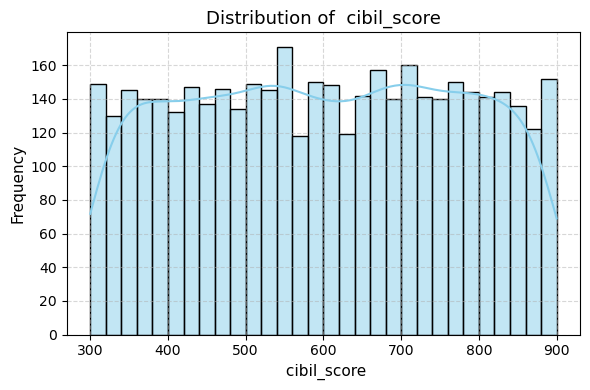

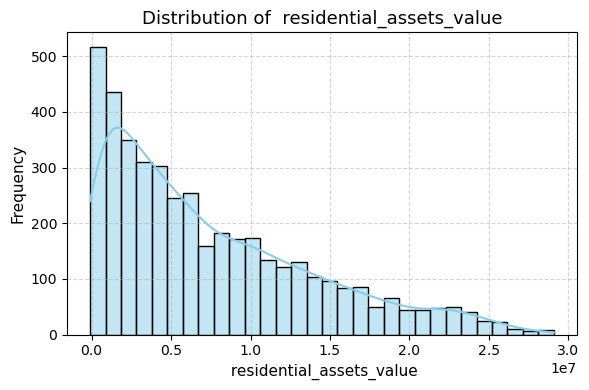

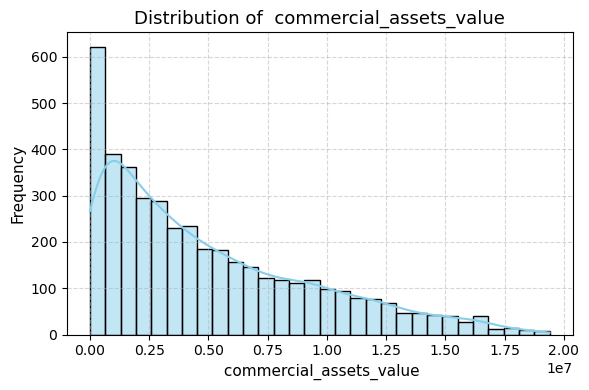

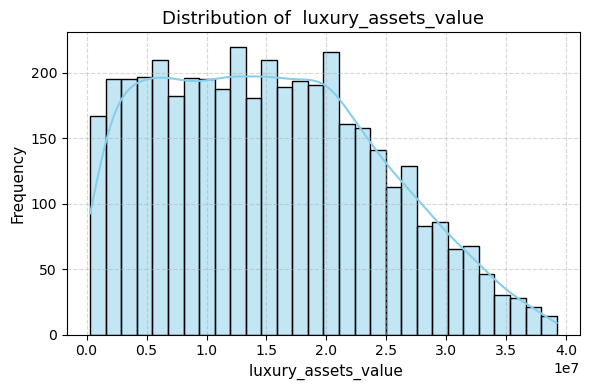

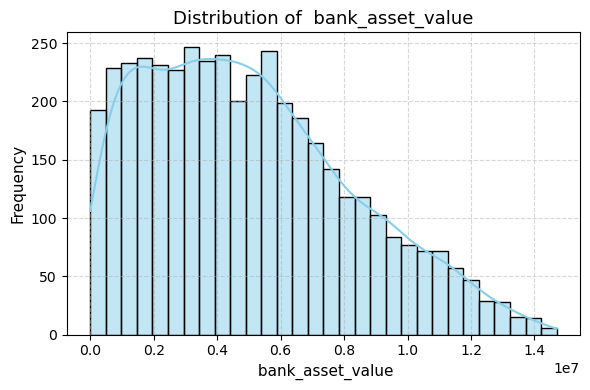

In [22]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# اختيار الأعمدة اللي عدد القيم الفريدة فيها 20 أو أكثر (continuous)
continuous_cols = [col for col in numerical_cols if df[col].nunique() >= 20]

# رسم توزيع كل عمود مستمر
for col in continuous_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=13)
    plt.xlabel(col, fontsize=11)
    plt.ylabel("Frequency", fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=[' loan_status'])
y = df[' loan_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (3201, 11)
Test shape: (1068, 11)


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
X_train_scaled[1][:]

array([ 1.47970524, -0.99594698,  0.99594698,  0.0865713 , -0.1182951 ,
       -0.84556065,  0.19016236,  0.68059805, -0.11205195, -0.25806354,
        0.34525343])

In [26]:
X_test_scaled[1][:]

array([-1.47214349, -0.99594698,  0.99594698,  1.12324922,  1.64506821,
       -0.84556065, -1.12964644, -0.54825131, -0.95734473,  0.96055897,
        0.22141599])

In [34]:
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

svc_model.fit(X_train_scaled, y_train)

y_pred = svc_model.predict(X_test_scaled)

print("✅ Model Evaluation")
print("----------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

✅ Model Evaluation
----------------------------
Accuracy: 0.9447565543071161

Confusion Matrix:
 [[380  24]
 [ 35 629]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       404
           1       0.96      0.95      0.96       664

    accuracy                           0.94      1068
   macro avg       0.94      0.94      0.94      1068
weighted avg       0.95      0.94      0.94      1068



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# إنشاء الموديل
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    subsample=0.8,
    colsample_bytree=0.8,

    eval_metric='logloss'
)

xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)

# تقييم الأداء
print("✅ XGBoost Model Evaluation")
print("----------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


✅ XGBoost Model Evaluation
----------------------------
Accuracy: 0.9850187265917603

Confusion Matrix:
 [[395   9]
 [  7 657]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       404
           1       0.99      0.99      0.99       664

    accuracy                           0.99      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.99      0.99      0.99      1068



best k) = 33
top acc= 0.9195


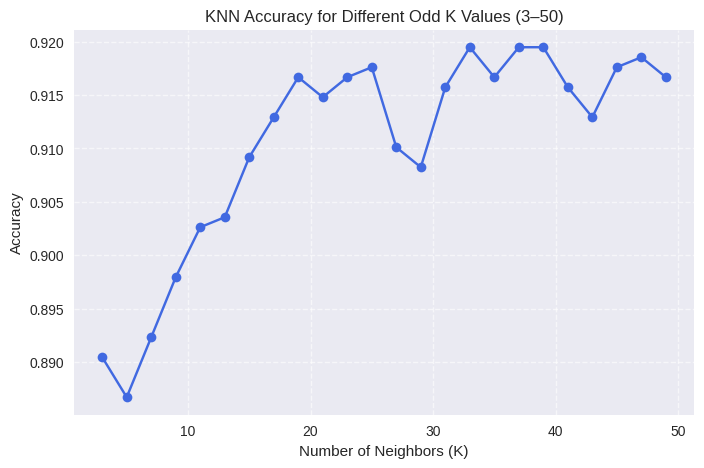

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# قائمة لتخزين النتائج
k_values = []
accuracies = []

# تجربة القيم الفردية من 3 إلى 50
for k in range(3, 51, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred_knn)
    k_values.append(k)
    accuracies.append(acc)

# أفضل k
best_k = k_values[accuracies.index(max(accuracies))]

print(f"best k) = {best_k}")
print(f"top acc= {max(accuracies):.4f}")

# رسم النتائج
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='royalblue')
plt.title('KNN Accuracy for Different Odd K Values (3–50)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [25]:
# Save the cleaned dataframe to CSV
df.to_csv('cleaned.csv', index=False)
print("✅ Cleaned data saved to 'cleaned.csv'")

✅ Cleaned data saved to 'cleaned.csv'


In [26]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [27]:
# Create train_df by combining X_train_scaled and y_train
# First, convert X_train_scaled back to a DataFrame with original column names
train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Add the target variable y_train
train_df[' loan_status'] = y_train.values

print("Train DataFrame shape:", train_df.shape)
train_df.head()

Train DataFrame shape: (3201, 12)


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.889335,1.004070,-1.004070,-0.628379,-0.365391,-1.541176,1.428930,0.058396,-0.591813,-0.334914,-0.614487,1
1,1.479705,-0.995947,0.995947,0.086571,-0.118295,-0.845561,0.190162,0.680598,-0.112052,-0.258064,0.345253,1
2,0.889335,-0.995947,0.995947,-1.128844,-0.926971,-0.845561,-0.238197,-0.594916,-0.637504,-0.982650,-1.171755,1
3,0.298966,1.004070,-1.004070,0.908764,1.296888,-1.193368,0.514326,-0.330481,-1.003036,1.004473,1.119237,1
4,0.889335,1.004070,-1.004070,-1.021602,-0.724802,1.589093,-1.314883,-0.517141,-0.843116,-1.015586,-1.109836,0


In [28]:
# Save the cleaned dataframe to CSV
train_df.to_csv('train.csv', index=False)
print("✅ Cleaned data saved to 'train.csv'")

✅ Cleaned data saved to 'train.csv'


In [33]:
test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Add the target variable y_train
test_df[' loan_status'] = y_test.values

print("Test DataFrame shape:", test_df.shape)
test_df.head()

Test DataFrame shape: (1068, 12)


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,-0.291404,1.004070,-1.004070,0.372551,0.948708,0.545670,-0.521840,0.245057,1.030236,-0.301978,-0.490649,0
1,-1.472143,-0.995947,0.995947,1.123249,1.645068,-0.845561,-1.129646,-0.548251,-0.957345,0.960559,0.221416,0
2,-0.881774,-0.995947,-1.004070,1.337734,0.578065,-0.845561,0.155431,2.609425,2.538055,0.268908,2.140896,1
3,-1.472143,-0.995947,-1.004070,1.444977,0.802697,-0.845561,-1.048606,-0.003824,-1.003036,0.334780,1.490750,0
4,0.889335,1.004070,0.995947,-0.521136,-0.623718,-1.541176,1.394198,-0.392701,-0.134898,-0.181213,-0.893121,1


In [34]:
X_test_scaled

array([[-0.291404  ,  1.00406951, -1.00406951, ...,  1.03023559,
        -0.30197786, -0.49064926],
       [-1.47214349, -0.99594698,  0.99594698, ..., -0.95734473,
         0.96055897,  0.22141599],
       [-0.88177374, -0.99594698, -1.00406951, ...,  2.53805515,
         0.26890836,  2.14089623],
       ...,
       [-0.291404  , -0.99594698, -1.00406951, ..., -0.63750422,
        -0.85090692, -0.49064926],
       [-0.88177374, -0.99594698, -1.00406951, ..., -0.52327546,
         0.22499403,  0.09757856],
       [-1.47214349,  1.00406951,  0.99594698, ..., -0.36335521,
        -0.98264989, -1.14079579]])

In [35]:
test_df.to_csv('test.csv', index=False)
print("✅ Cleaned data saved to 'test.csv'")

✅ Cleaned data saved to 'test.csv'
